In [1]:
#import packages, concatenate csv files into dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []
for n in files:
  data = pd.read_csv(n)
  df_list.append(data)
census_df = pd.concat(df_list)

In [2]:
#View the data

print(census_df.head())
print('\nColumns')
print(census_df.columns)
print('\nDatatypes in each Column')
print(census_df.dtypes)

#Count the duplicates
print('\nDuplicate Count:')
print(census_df.duplicated(subset='State').value_counts())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

In [3]:
#Drop the duplicates
census_df = census_df.drop_duplicates('State')

#Double-check dataframe 
#census_df

In [4]:
#Remove commas and dollar signs from income column and convert values into numeric data

census_df.Income = census_df.Income.replace(r'[,\$]','', regex=True)
census_df.Income = pd.to_numeric(census_df.Income)

In [5]:
#Split gender into multiple columns
gender_split = census_df.GenderPop.str.split('_')

census_df['Men'] = gender_split.str.get(0)
census_df['Women'] = gender_split.str.get(1)

#Remove M and F characters and convert values into numeric data
census_df.Men = census_df.Men.replace(r'M','', regex=True)
census_df.Men = pd.to_numeric(census_df.Men)
census_df.Women = census_df.Women.replace(r'F','', regex=True)
census_df.Women = pd.to_numeric(census_df.Women)

#Check the new Women column for NaN values
print('Number of NaN values in Women column:', census_df.Women.isnull().sum())

Number of NaN values in Women column: 2


In [6]:
#Remove old gender column
census_df = census_df.drop(columns=['GenderPop'])

#Fill in missing values in the Women column
census_df['Women'] = census_df['Women'].fillna(census_df.TotalPop - census_df.Men)

Text(0.5, 1.0, 'Gender Ratio and Income')

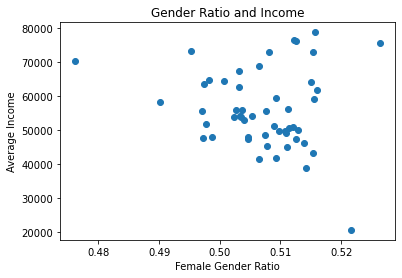

In [7]:
#View replationship between population gender ratio and average income
plt.scatter(census_df.Women/(census_df.Women+census_df.Men), census_df.Income) 
plt.xlabel('Female Gender Ratio')
plt.ylabel('Average Income')
plt.title('Gender Ratio and Income')


In [8]:
#Remove percentage signs from dataframe and convert values into numeric data

census_df.Hispanic = census_df.Hispanic.replace('[%,]','',regex=True)
census_df.Hispanic = pd.to_numeric(census_df.Hispanic)

census_df.White = census_df.White.replace('[%,]','',regex=True)
census_df.White = pd.to_numeric(census_df.White)

census_df.Black = census_df.Black.replace('[%,]','',regex=True)
census_df.Black = pd.to_numeric(census_df.Black)

census_df.Native = census_df.Native.replace('[%,]','',regex=True)
census_df.Native = pd.to_numeric(census_df.Native)

census_df.Asian = census_df.Asian.replace('[%,]','',regex=True)
census_df.Asian = pd.to_numeric(census_df.Asian)

census_df.Pacific = census_df.Pacific.replace('[%,]','',regex=True)
census_df.Pacific = pd.to_numeric(census_df.Pacific)


In [9]:
#Recheck datatypes
print(census_df.dtypes)

#Check for nan values
print(census_df.isnull().sum())


Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Men             int64
Women         float64
dtype: object
Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       4
Income        0
Men           0
Women         0
dtype: int64


In [10]:
#Fill in missing values in the 'Pacific' column
census_df['Pacific'] = census_df['Pacific'].fillna(100 - (census_df['Hispanic'] +census_df['Black']+census_df['White']+census_df['Native']+census_df['Asian']))


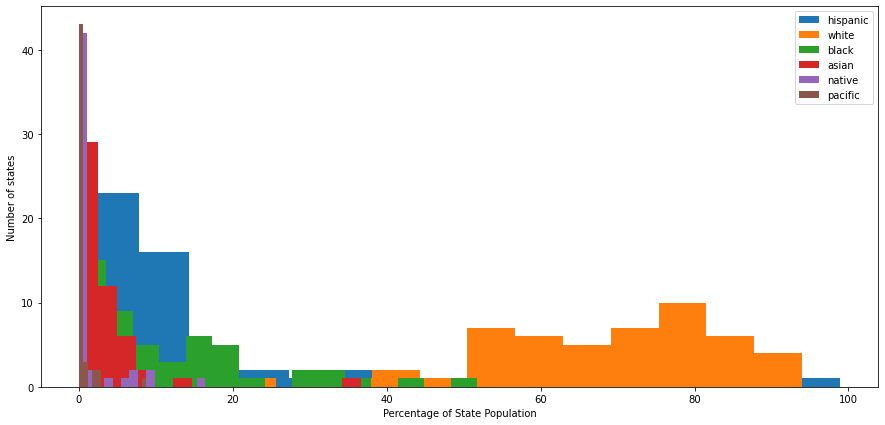

In [11]:

plt.figure(figsize=(15,7))

plt.hist(census_df.Hispanic, bins=15, label='hispanic')
plt.hist(census_df.White, bins=15, label='white')
plt.hist(census_df.Black, bins=15, label='black')
plt.hist(census_df.Asian, bins=15, label='asian')
plt.hist(census_df.Native, bins=15, label='native')
plt.hist(census_df.Pacific, bins=15, label='pacific')
plt.legend()
plt.xlabel('Percentage of State Population')
plt.ylabel('Number of states')

plt.show()
